In [1]:
import quickdraw

2022-06-07 10:47:13.860358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-07 10:47:13.860381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
?quickdraw.load_data

In [3]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

19381279/19381279 [==============================] - 0s 0us/step


In [5]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

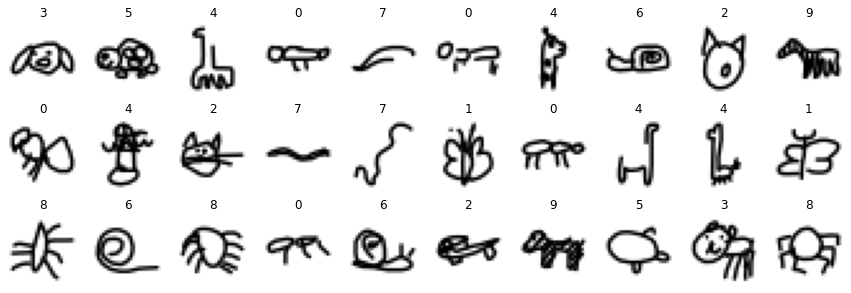

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [15]:
x_train = x_train.astype(float).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(float).reshape(-1, 28*28) / 255.0

In [20]:
x_train.shape

(60000, 784)

In [16]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [17]:
y_test[:10]

array([8, 1, 9, 2, 6, 2, 2, 9, 4, 2], dtype=uint8)

In [18]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [19]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
# Deep learning 

# create model
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28*28,), name='Input'))  # use 10, to add as tuple, we have 10 samples
neural.add(keras.layers.Dense(units=256, activation='relu', name='Hidden_1'))
neural.add(keras.layers.Dense(units=64, activation='relu', name='Hidden_2'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 Hidden_2 (Dense)            (None, 64)                16448     
                                                                 
 Hidden_3 (Dense)            (None, 16)                1040      
                                                                 
 Output (Dense)              (None, 10)                170       
                                                                 
Total params: 218,618
Trainable params: 218,618
Non-trainable params: 0
_________________________________________________________________


In [27]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=25,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/25


2022-06-07 11:24:14.082069: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


600/600 [==============================] - 2s 3ms/step - loss: 2.2079 - categorical_accuracy: 0.1549 - val_loss: 2.0819 - val_categorical_accuracy: 0.2418
Epoch 2/25
600/600 [==============================] - 1s 2ms/step - loss: 1.8396 - categorical_accuracy: 0.3816 - val_loss: 1.5897 - val_categorical_accuracy: 0.4872
Epoch 3/25
600/600 [==============================] - 1s 2ms/step - loss: 1.4894 - categorical_accuracy: 0.5114 - val_loss: 1.4253 - val_categorical_accuracy: 0.5362
Epoch 4/25
600/600 [==============================] - 1s 2ms/step - loss: 1.3611 - categorical_accuracy: 0.5567 - val_loss: 1.3238 - val_categorical_accuracy: 0.5730
Epoch 5/25
600/600 [==============================] - 1s 2ms/step - loss: 1.2781 - categorical_accuracy: 0.5880 - val_loss: 1.2733 - val_categorical_accuracy: 0.5901
Epoch 6/25
600/600 [==============================] - 1s 2ms/step - loss: 1.2150 - categorical_accuracy: 0.6106 - val_loss: 1.2165 - val_categorical_accuracy: 0.6097
Epoch 7/25
600/

In [28]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

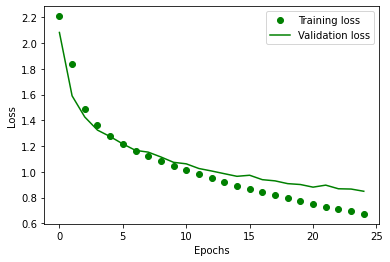

In [29]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

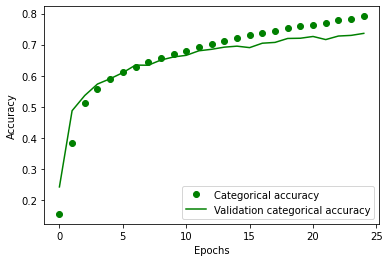

In [31]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Categorical accuracy')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation categorical accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

313/313 [==============================] - 0s 1ms/step


array([8, 1, 9, ..., 2, 6, 5])

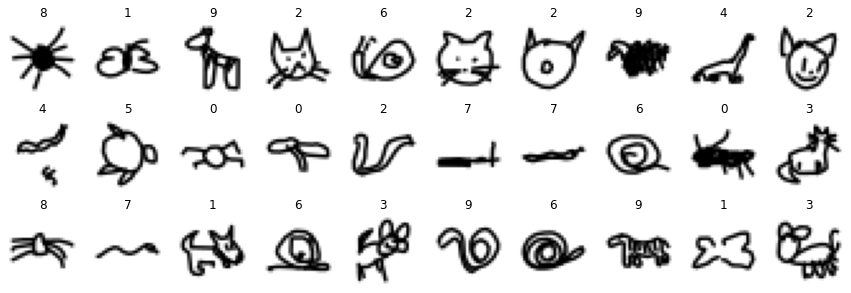

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(labeltest[img]))
plt.show()

In [43]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[573,  30,  30,  67,  27,  21,  16,  60,  93,  65],
       [ 13, 905,  24,  31,   0,   5,  16,   7,  14,   3],
       [ 28,  16, 665,  94,  13,  34,  46,  20,  35,  30],
       [ 84,  32, 101, 544,  19,  70,  34,  49,  21,  80],
       [ 11,   1,  11,   7, 897,   1,   5,  38,   2,  18],
       [ 37,  11,  39,  60,   1, 658,  30,  27,  72,  54],
       [ 22,  20,  23,  30,   3,  31, 770,  17,   3,  32],
       [ 20,  11,   8,  35,  70,  19,  26, 816,   8,   8],
       [ 81,  29,  36,  19,   5,  63,  17,  13, 689,  15],
       [ 30,   2,  16,  70,  17,  31,  30,  10,  15, 845]])

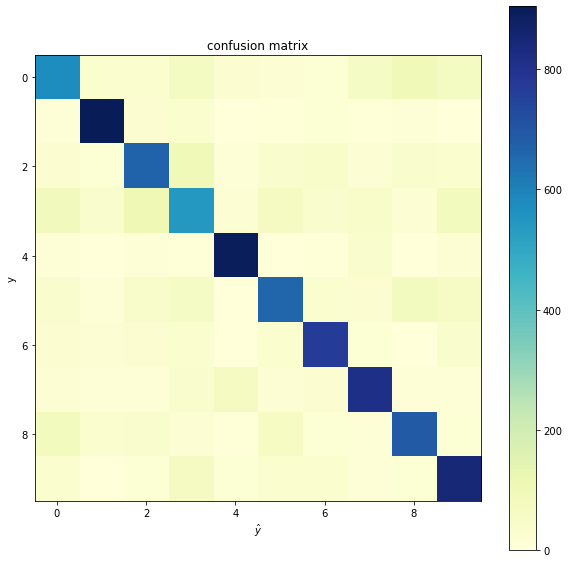

In [47]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.736
bAcc: 0.736


In [51]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.6374    0.5835    0.6093       982
           1     0.8562    0.8890    0.8723      1018
           2     0.6978    0.6779    0.6877       981
           3     0.5684    0.5261    0.5465      1034
           4     0.8527    0.9051    0.8781       991
           5     0.7053    0.6653    0.6847       989
           6     0.7778    0.8097    0.7934       951
           7     0.7720    0.7992    0.7854      1021
           8     0.7237    0.7125    0.7181       967
           9     0.7348    0.7927    0.7626      1066

    accuracy                         0.7362     10000
   macro avg     0.7326    0.7361    0.7338     10000
weighted avg     0.7323    0.7362    0.7337     10000

